### 58 Convolutions

Une *matrice* (ou *masque*) *de convolution* $m$ $3\times3$ permet de transformer une image : chaque pixel est remplacé par la somme de sa valeur et des pixels voisins, chacun étant affectés d’un coefficient défini par $m$.

Compléter le fichier `exo-convolutions.py` pour :

a) Écrire une fonction `decale(m,dx,dy)` qui prend en entrée une matrice `m` d’entiers binaires 0-1 et renvoie une matrice de même dimension dans laquelle les `1` sont décalés de `dx` cases vers la droite et `dy` vers le bas.


In [ ]:
def decale(m,dx,dy):
    """ 
    Entrée : une matrice de 0-1
    Renvoie une nouvelle matrice obtenue de la précédente en 
    décalant tous les "1" de `dx` cases vers la droite et `dy` vers le bas. 

    Lorsqu'une valeur recherchée dépasse du bord, on obtient la valeur en "bouclant" à partir du bord opposé. 
    Dit autrement: les accès à la matrice m sont effectués "modulo" la longueur correspondante.
    """
    # initialiser
    r = [[0]*len(m[0]) for i in range(len(m))]
    # ou directement r = [[0 for x in ligne] for ligne in m]
    for y in range(len(m)):
        for x in range(len(m[0])):
            r[...%len(m)][...%len(m[0])] = m[y][x]
            # A compléter: remplacer les ... ci dessus.
    return r

# Test:
m=[[0,1,0,0],[0,1,1,0],[0,0,0,0],[0,0,0,0]]
print(decale(m,0,1)==[[0, 0, 0, 0], [0, 1, 0, 0], [0, 1, 1, 0], [0, 0, 0, 0]])

import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(m,cmap='Greys_r')
plt.title("image d'origine")
plt.subplot(1,2,2)
plt.imshow(decale(m,0,1),cmap='Greys_r')
plt.title("image décalée dx=0, dy=1")
plt.show()

b) Écrire une fonction qui prend en entrée une matrice représentant une image, les coordonnées d’un pixel de l’image, une matrice de convolution $3\times 3$, et applique comme expliqué dans le fichier la convolution pour déterminer la nouvelle valeur du pixel.

Point culturel: 

Une _convolution_ est une opération mathématique commutative qui prend en entrée 2 fonctions $f$ et $g$, et renvoie une nouvelle fonction sur le même domaine; c'est une forme de _produit_, c'est pourquoi on parle parfois de produit de convolution, et la note avec un symbole produit $f*g$. Pour des fonctions réelles, on la définit par :  
$f*g:t\mapsto f*g\:(t)=\int_{-\infty}^\infty f(\tau)\cdot g(u-\tau)\,du$. 

Pour une fonction discrète définie sur les entiers, on utilise naturellement la somme au lieu de l'intégrale :  
$f*g:n\mapsto f*g\:[n]=\sum_{m=-\infty}^\infty f[m]\cdot g[n-m]$.

Les définitions ci-dessus s'étendent naturellement à des données de dimension $d>1$, la somme ou l'intégrale s'effectuant alors sur l'ensemble du domaine (par exemple : $\mathbb{N}^d$ au lieu de $\mathbb{N}$).

Le produit de convolution est tout particulièrement utilisé en traitement du signal, que ce soit en physique ou en informatique (acoustique, traitement d'image).

Dans le cas qui nous intéresse, nous allons calculer la convolution entre 2 images (matrices de valeurs) img1 et img2, donc des données discrètes sur un espace de dimension 2, ce qui donne pour formule:

$img1 * img2 : [(x,y)] \mapsto \sum_{(x',y')\in\mathbf{N}^2} img1[(x',y')]\cdot img2[(x,y)-(x',y')]$. 

Si on utilise la notation que nous utilisons en Python pour manipuler les matrices, cela signifie que le produit de convolution de 2 matrices ressemblera à :

$img1 * img2 : [(x,y)] \mapsto \sum_{(x',y')\in\mathbf{N}^2} img1[x'][y']\cdot img2[x-x'][y-y']$. 

Dans notre application, la somme ne porte pas sur tout $\mathbf{N}^2$ mais sur les indices de matrices 3x3. 

Nous allons essentiellement calculer pour chaque pixel de l'image d'origine une convolution entre 2 matrices 3x3.
Pour chaque pixel (x,y) de l'image d'origine, la valeur que l'on veut calculer est le produit de convolution entre

- une première matrice 3x3 appelée le "masque de convolution"
- les 3x3 pixels autour de ce pixel, en allant chercher le pixel sur l'autre bord si l'on déborde de la matrice (on utilisera donc un "modulo" lors des accès à la matrice).

Les illustrations ci-dessous décrivent comment est calculée la convolution sur 2 points de la matrice de l'image.

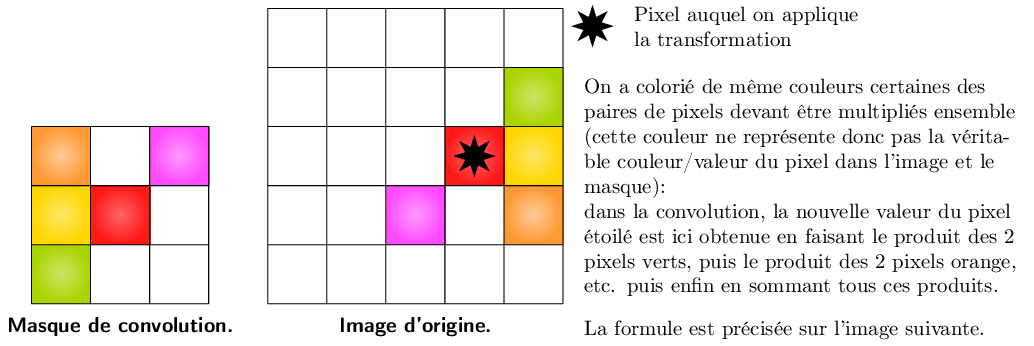

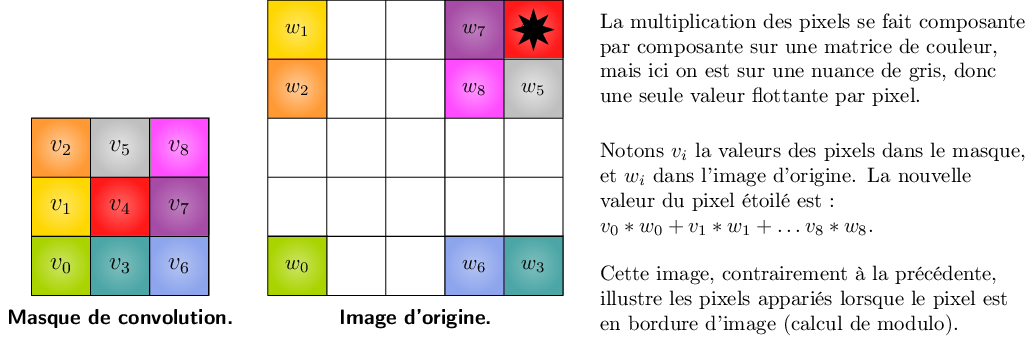

b-1) Compléter la fonction `convolution_px` qui calcule la valeur de la convolution pour un pixel donné de l'image.

In [6]:
def convolution_px(m,masque,i,j):
    """
    Entrée : 
    - une matrice m de triplets, 
    - une seconde matrice 3x3 formant le masque de convolution.
    - deux indices i<len(m),j<len(m[0])
    Renvoie: la valeur lorsqu'on lui applique le produit de convolution entre les 3x3 pixels entourant (i,j) et le masque.
    Les accès à la matrice m sont effectués "modulo" dans le cas où l'on accède à un pixel hors de la matrice 

    i ordonnée
    j abscisse


    """
    som = 0

    for y in range(-1, 2):
        for x in range(-1, 2):
            print((i+y)%4, (j+x)%4)
            print(masque[(i+y)%4][(j+x)%4])
            som += masque[(i+y)%4][(j+x)%4] * m[-y][-x]

    return som
    # A compléter

# Test:
m = [[0,1,0,0],[0,1,1,0],[0,0,0,0],[0,0,0,0]]
masque = [[0,0,0],[0,0,0],[0,1,0]]
print(convolution_px(m,masque,0,0)==0)
print(convolution_px(m,masque,1,1)==1)
print(convolution_px(m,masque,0,1)==0)

m = [[0,1,2,3],[0,4,5,6],[0,7,8,9],[0,10,11,12]]
masque = [[1,2,3],[40,50,60],[700,800,900]]
print(convolution_px(m,masque,2,2)==13044)
# 7*60+8*50+9*40+4*900+5*800+6*700+10*3+11*2+12*1 == 13044

IndexError: list index out of range

b-2) Compléter ensuite la fonction `convolution` qui calcule la valeur de la convolution sur chacun des pixels de l'image et renvoie donc l'image résultante.

In [2]:
def convolution_px(m,masque,i,j):
    """
    Entrée : 
    - une matrice m de triplets, 
    - une seconde matrice 3x3 formant le masque de convolution.
    - deux indices i<len(m),j<len(m[0])
    i ordonnée j abscisse
    Renvoie: la valeur lorsqu'on lui applique le produit de convolution entre les 3x3 pixels entourant (i,j) et le masque.
    Les accès à la matrice m sont effectués "modulo" dans le cas où l'on accède à un pixel hors de la matrice 
    """
    vals = 0

    indices_relatifs = [
        [(-1, -1), (-1, 0), (-1, 1)],
        [(0, -1),  (0, 0),  (0, 1)],
        [(1, -1),  (1, 0),  (1, 1)],
    ]

    for y in range(3):
        for x in range(3):
            dy, dx = indices_relatifs[y][x]
            itemp = i + dy
            jtemp = j + dx

            if itemp < 0:
                itemp += len(m)
            elif itemp >= len(m):
                itemp -= len(m)
            
            if jtemp < 0:
                jtemp += len(m[0])
            elif jtemp >= len(m[0]):
                jtemp -= len(m[0])

            vals += m[itemp][jtemp] * masque[y][x]

    return vals

# Test:
m = [[0,1,0,0],[0,1,1,0],[0,0,0,0],[0,0,0,0]]
masque = [[0,0,0],[0,0,0],[0,1,0]]
print(convolution_px(m,masque,0,0)==0)
print(convolution_px(m,masque,1,1)==1)
print(convolution_px(m,masque,0,1)==0)

m = [[0,1,2,3],[0,4,5,6],[0,7,8,9],[0,10,11,12]]
masque = [[1,2,3],[40,50,60],[700,800,900]]
print(convolution_px(m,masque,2,2)==13044)
# 7*60+8*50+9*40+4*900+5*800+6*700+10*3+11*2+12*1 == 13044


True
False
False
False


c) Puis suivre les indications du fichier pour évaluer différentes convolutions sur des images.

Appliquer la fonction convolution à l'image et au masque donnés ci-dessous. 
Puis, donner les masques qui permettent:
- de renvoyer une copie identique à l'image (transformation "identité", c'est-à-dire pas de transformation).
- de décaler l'image vers la gauche.

Pour aller plus loin, on pourra tester sur de plus grosses images des masques permettant d'augmenter la netteté ou de renforcer les contours (il peut être utile de traiter les valeurs dépassant les bornes 0 et 255, par exemple en rééchelonnant).

In [ ]:
m = [[0,1,0,0],[0,1,1,0],[0,0,0,0],[0,0,0,0]]
masque = [[0,0,0],[0,0,0],[0,1,0]]
print('décalage_bas:',... ) # A compléter ici pour remplacer ... par l'image transformée.

import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(m,cmap='Greys_r')
plt.title("image d'origine")
plt.subplot(1,2,2)
plt.imshow(...,cmap='Greys_r') # A compléter: remplacer ... par l'image transformée.
plt.title("image obtenue par convolution")
plt.show()